# Final Modelling

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [33]:
df = pd.read_csv("https://raw.githubusercontent.com/Refdinal/insight-hustler/refs/heads/master/data/processed/data_preprocessed.csv")

In [34]:
df

,city_development_index,relevent_experience,education_level,experience,last_new_job,training_hours,gender_Female,gender_Male,gender_Other,enrolled_university_Full time course,...,company_size_Unknown,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Unknown,training_per_experience,target
0,0.920,1,3,21,1,3.610918,False,True,False,False,...,True,False,False,False,False,False,False,True,1.636364,1.0
1,0.776,0,3,15,5,3.871201,False,True,False,False,...,False,False,False,False,False,False,True,False,2.937500,0.0
2,0.624,0,3,5,0,4.430817,False,False,True,True,...,True,False,False,False,False,False,False,True,13.833333,0.0
3,0.767,1,4,21,4,2.197225,False,True,False,False,...,False,False,True,False,False,False,False,False,0.363636,0.0
4,0.764,1,3,11,1,3.218876,False,False,True,False,...,True,False,False,False,False,False,False,True,2.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18000,0.878,0,3,14,1,3.761200,False,True,False,False,...,True,False,False,False,False,False,False,True,2.800000,1.0
18001,0.920,1,3,14,4,3.970292,False,True,False,False,...,True,False,False,False,False,False,False,True,3.466667,1.0
18002,0.920,1,3,21,4,3.806662,False,True,False,False,...,False,False,False,False,False,False,True,False,2.000000,0.0
18003,0.802,1,2,0,2,4.584967,False,True,False,False,...,False,False,False,False,False,False,True,False,97.000000,0.0


## Split Data Train-test

In [36]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

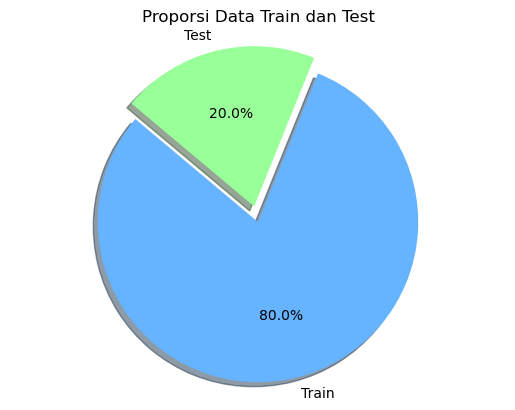

In [38]:
# Membuat pie chart untuk proporsi data train dan test
labels = ['Train', 'Test']
sizes = [len(X_train), len(X_test)]
colors = ['#66b3ff', '#99ff99']
explode = (0.1, 0)  # meledakkan sedikit bagian 'Train' untuk efek visual

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Membuat chart dalam bentuk lingkaran
plt.title('Proporsi Data Train dan Test')
plt.show()

## SMOTE for imbalance data to training data

In [39]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

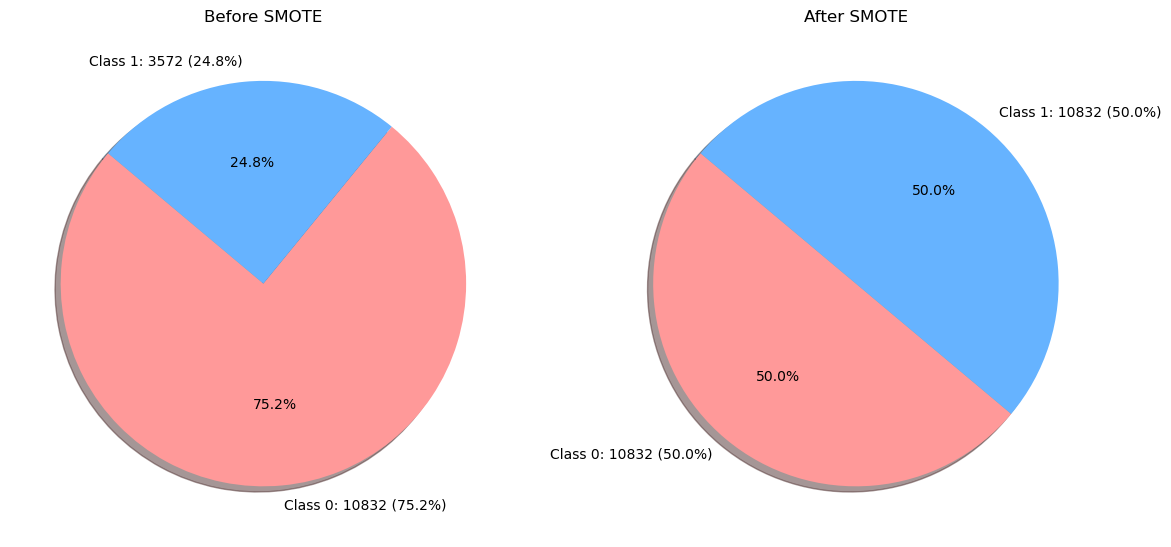

In [40]:
# Menghitung jumlah data sebelum dan sesudah SMOTE
sizes_before = [y_train.value_counts().get(0, 0), y_train.value_counts().get(1, 0)]
sizes_after = [y_train_resampled.value_counts().get(0, 0), y_train_resampled.value_counts().get(1, 0)]

# Plot untuk sebelum SMOTE
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Menampilkan pie chart sebelum SMOTE
plt.pie(sizes_before, labels=[f'Class 0: {sizes_before[0]} ({sizes_before[0] / sum(sizes_before) * 100:.1f}%)',
                              f'Class 1: {sizes_before[1]} ({sizes_before[1] / sum(sizes_before) * 100:.1f}%)'],
        autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], startangle=140, shadow=True)
plt.title('Before SMOTE')

# Plot untuk sesudah SMOTE
plt.subplot(1, 2, 2)  # Menampilkan pie chart setelah SMOTE
plt.pie(sizes_after, labels=[f'Class 0: {sizes_after[0]} ({sizes_after[0] / sum(sizes_after) * 100:.1f}%)',
                             f'Class 1: {sizes_after[1]} ({sizes_after[1] / sum(sizes_after) * 100:.1f}%)'],
        autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], startangle=140, shadow=True)
plt.title('After SMOTE')

plt.tight_layout()
plt.show()

## Scaling data dengan standar scaler

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18005 entries, 0 to 18004
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   city_development_index                18005 non-null  float64
 1   relevent_experience                   18005 non-null  int64  
 2   education_level                       18005 non-null  int64  
 3   experience                            18005 non-null  int64  
 4   last_new_job                          18005 non-null  int64  
 5   training_hours                        18005 non-null  float64
 6   gender_Female                         18005 non-null  bool   
 7   gender_Male                           18005 non-null  bool   
 8   gender_Other                          18005 non-null  bool   
 9   enrolled_university_Full time course  18005 non-null  bool   
 10  enrolled_university_No Enrollment     18005 non-null  bool   
 11  enrolled_univer

In [98]:
num_cols = X.select_dtypes(include = ['int64', 'float64']).columns.to_list()
non_num_cols = X.select_dtypes(exclude = ['int64', 'float64']).columns.to_list()
scaler = StandardScaler()
scaler.fit(X_train_resampled[num_cols])
X_train_scaled = pd.DataFrame(scaler.transform(X_train_resampled[num_cols]))  # Fit dan transform data latih
X_test_scaled = pd.DataFrame(scaler.transform(X_test[num_cols]))  # Hanya transform data uji
X_train_scaled = pd.concat([X_train_scaled, X_train_resampled[non_num_cols]], axis=1).to_numpy()
X_test_scaled = pd.concat([X_test_scaled, X_test[non_num_cols].reset_index(drop=True)], axis=1).to_numpy()

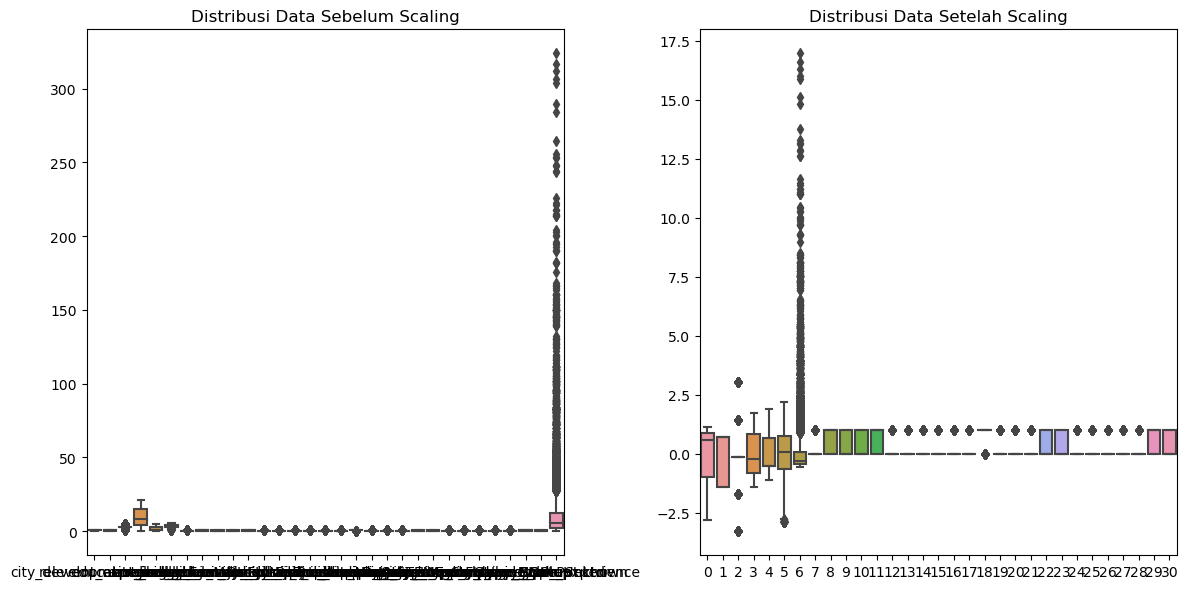

In [99]:
# Menampilkan grafik distribusi fitur sebelum dan sesudah scaling
plt.figure(figsize=(12, 6))

# Plot distribusi data sebelum scaling (X_train_resampled)
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train_resampled)
plt.title('Distribusi Data Sebelum Scaling')

# Plot distribusi data setelah scaling (X_train_scaled)
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('Distribusi Data Setelah Scaling')

plt.tight_layout()
plt.show()

# 1. Modelling

In [100]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)

def evaluate_metrics(model, X_train, y_train, X_test, y_test):
    """
    Evaluates a classification model and returns a DataFrame with key metrics for both train and test datasets.

    Parameters:
    - model: Trained classification model (e.g., LogisticRegression, RandomForestClassifier, etc.)
    - X_train: Training features
    - y_train: Training labels
    - X_test: Test features
    - y_test: Test labels

    Returns:
    - metrics_df: A DataFrame containing evaluation metrics for both train and test sets.
    """
    # Predictions and probabilities
    y_pred_train = model.predict(X_train)
    y_proba_train = model.predict_proba(X_train)[:, 1]

    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1]

    # Metrics for Train Set
    train_metrics = {
        "Accuracy": accuracy_score(y_train, y_pred_train),
        "Precision": precision_score(y_train, y_pred_train),
        "Recall": recall_score(y_train, y_pred_train),
        "F1-Score": f1_score(y_train, y_pred_train),
        "ROC-AUC": roc_auc_score(y_train, y_proba_train),
    }

    # Metrics for Test Set
    test_metrics = {
        "Accuracy": accuracy_score(y_test, y_pred_test),
        "Precision": precision_score(y_test, y_pred_test),
        "Recall": recall_score(y_test, y_pred_test),
        "F1-Score": f1_score(y_test, y_pred_test),
        "ROC-AUC": roc_auc_score(y_test, y_proba_test),
    }

    # Combine metrics into a DataFrame
    metrics_df = pd.DataFrame([train_metrics, test_metrics], index=["Train", "Test"])

    return metrics_df.T

## Model 1 : LGBM Classifier

In [101]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

# Menentukan parameter untuk RandomizedSearchCV
param_dist = {
    'num_leaves': [31, 50, 100],  # Jumlah daun dalam pohon
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Laju pembelajaran
    'n_estimators': [50, 100, 200, 500],  # Jumlah estimasi (pohon)
    'max_depth': [-1, 3, 5, 10],  # Kedalaman maksimum pohon
    'min_child_samples': [10, 20, 30],  # Jumlah minimal sampel pada node
    'subsample': [0.6, 0.7, 0.8, 1.0],  # Proporsi sampel yang digunakan
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],  # Proporsi kolom yang digunakan
    'reg_alpha': [0, 0.1, 0.5, 1],  # Regularisasi L1
    'reg_lambda': [0, 0.1, 0.5, 1],  # Regularisasi L2
}

# Membuat model LGBMClassifier
lgbm = LGBMClassifier(random_state=2021)
lgbm_tuned = RandomizedSearchCV(
    lgbm,
    param_distributions=param_dist,
    n_iter=5,  # Banyaknya kombinasi yang dicoba
    scoring='accuracy',  # Skor akurasi
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Menampilkan progress
    random_state=2021,
    n_jobs=-1  # Gunakan semua CPU yang tersedia
)

# Melatih model menggunakan data training (X_train_balanced dan Y_train_balanced adalah data latih Anda)
lgbm_tuned.fit(X_train_scaled, y_train_resampled)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[LightGBM] [Info] Number of positive: 10832, number of negative: 10832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 849
[LightGBM] [Info] Number of data points in the train set: 21664, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=2021), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [-1, 3, 5, 10],
                                        'min_child_samples': [10, 20, 30],
                                        'n_estimators': [50, 100, 200, 500],
                                        'num_leaves': [31, 50, 100],
                                        'reg_alpha': [0, 0.1, 0.5, 1],
                                        'reg_lambda': [0, 0.1, 0.5, 1],
                                        'subsample': [0.6, 0.7, 0.8, 1.0]},
                   random_state=2021, scoring='accuracy', verbose=1)

In [111]:
lgbm_tuned_result = evaluate_metrics(lgbm_tuned.best_estimator_, X_train_scaled, y_train_resampled, X_test_scaled, y_test)
lgbm_tuned_result

,Train,Test
Accuracy,0.926145,0.784227
Precision,0.930035,0.538976
Recall,0.921621,0.571429
F1-Score,0.925809,0.554728
ROC-AUC,0.982485,0.783921


In [112]:
lgbm_tuned.best_score_

0.8343367665827266

## Model 2 : XGBoost

In [106]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Menentukan parameter untuk RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 500],  # Jumlah estimasi (pohon)
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Laju pembelajaran
    'max_depth': [3, 5, 10, 15],  # Kedalaman maksimum pohon
    'min_child_weight': [1, 3, 5],  # Berat minimum pada anak pohon
    'subsample': [0.6, 0.7, 0.8, 1.0],  # Proporsi sampel yang digunakan
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],  # Proporsi kolom yang digunakan
    'gamma': [0, 0.1, 0.5, 1],  # Regularisasi pada pohon
    'reg_alpha': [0, 0.1, 0.5, 1],  # Regularisasi L1
    'reg_lambda': [0, 0.1, 0.5, 1],  # Regularisasi L2
}

# Membuat model XGBClassifier
xgb = XGBClassifier(random_state=2021, use_label_encoder=False, eval_metric='mlogloss')

xgb_tuned = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=5,  # Banyaknya kombinasi yang dicoba
    scoring='accuracy',  # Skor akurasi
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Menampilkan progress
    random_state=2021,
    n_jobs=-1  # Gunakan semua CPU yang tersedia
)

# Melatih model menggunakan data training (X_train_scaled dan y_train_resampled adalah data latih Anda)
xgb_tuned.fit(X_train_scaled, y_train_resampled)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learnin...
                                           random_state=2021, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.5, 1],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 10, 15],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200, 500],
                                        'reg_alpha': [0, 0.1, 0.5, 1],
                                        'reg_lambda': [0, 0.1, 0.5, 1],
                                        'subsample': [0.6, 0.7, 0.8, 1.0]},
                   random_state=2021, scoring='accuracy', verbose=1)

In [113]:
xgb_tuned_result = evaluate_metrics(xgb_tuned.best_estimator_, X_train_scaled, y_train_resampled, X_test_scaled, y_test)
xgb_tuned_result

,Train,Test
Accuracy,0.942485,0.773952
Precision,0.946276,0.518313
Recall,0.938239,0.551358
F1-Score,0.942240,0.534325
ROC-AUC,0.988616,0.778156


In [114]:
xgb_tuned.best_score_

0.8311054717825087

### Model 3 : Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Menentukan parameter untuk RandomizedSearchCV
param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parameter regularisasi (nilai lebih kecil = regularisasi lebih kuat)
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga'],  # Algoritma solver yang digunakan
    'penalty': ['l2', 'none'],  # Tipe regularisasi
    'max_iter': [100, 200, 300, 400],  # Jumlah iterasi untuk konvergensi
    'tol': [1e-4, 1e-3, 1e-2],  # Batas toleransi untuk konvergensi
}

# Membuat model LogisticRegression
log_reg = LogisticRegression(random_state=2021)

log_reg_tuned = RandomizedSearchCV(
    log_reg,
    param_distributions=param_dist,
    n_iter=5,  # Banyaknya kombinasi yang dicoba
    scoring='accuracy',  # Skor akurasi
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Menampilkan progress
    random_state=2021,
    n_jobs=-1  # Gunakan semua CPU yang tersedia
)

# Melatih model menggunakan data training (X_train_scaled dan y_train_resampled adalah data latih Anda)
log_reg_tuned.fit(X_train_scaled, y_train_resampled)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=2021),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'max_iter': [100, 200, 300, 400],
                                        'penalty': ['l2', 'none'],
                                        'solver': ['liblinear', 'lbfgs',
                                                   'newton-cg', 'saga'],
                                        'tol': [0.0001, 0.001, 0.01]},
                   random_state=2021, scoring='accuracy', verbose=1)

In [116]:
log_reg_tuned_result = evaluate_metrics(log_reg_tuned.best_estimator_, X_train_scaled, y_train_resampled, X_test_scaled, y_test)
log_reg_tuned_result

,Train,Test
Accuracy,0.807561,0.771730
Precision,0.832784,0.514620
Recall,0.769664,0.519481
F1-Score,0.799981,0.517039
ROC-AUC,0.891798,0.769059


In [117]:
log_reg_tuned.best_score_

0.7961624045659595

## Model 4 : Random Forest Classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Menentukan parameter untuk RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 500],  # Jumlah pohon dalam hutan
    'max_depth': [3, 5, 10, 15, None],  # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],  # Minimal sampel untuk split
    'min_samples_leaf': [1, 2, 4],  # Minimal sampel pada daun
    'max_features': ['auto', 'sqrt', 'log2'],  # Banyaknya fitur yang dipertimbangkan untuk split
    'bootstrap': [True, False],  # Apakah sampling dengan penggantian digunakan
    'criterion': ['gini', 'entropy'],  # Kriteria untuk mengukur kualitas split
}

# Membuat model RandomForestClassifier
rf = RandomForestClassifier(random_state=2021)

rf_tuned = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=5,  # Banyaknya kombinasi yang dicoba
    scoring='accuracy',  # Skor akurasi
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Menampilkan progress
    random_state=2021,
    n_jobs=-1  # Gunakan semua CPU yang tersedia
)

# Melatih model menggunakan data training (X_train_scaled dan y_train_resampled adalah data latih Anda)
rf_tuned.fit(X_train_scaled, y_train_resampled)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2021),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, 15, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=2021, scoring='accuracy', verbose=1)

In [119]:
rf_tuned_result = evaluate_metrics(rf_tuned.best_estimator_, X_train_scaled, y_train_resampled, X_test_scaled, y_test)
rf_tuned_result

,Train,Test
Accuracy,0.998708,0.765621
Precision,0.998431,0.501792
Recall,0.998984,0.495868
F1-Score,0.998708,0.498812
ROC-AUC,0.999978,0.759118


In [120]:
log_reg_tuned.best_score_

0.7961624045659595

## Model 5 : Catboost Classifier

In [123]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

# Menentukan parameter untuk RandomizedSearchCV
param_dist = {
    'iterations': [50, 100, 200, 500],  # Jumlah iterasi (pohon)
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Laju pembelajaran
    'depth': [3, 5, 10, 15],  # Kedalaman pohon
    'l2_leaf_reg': [1, 3, 5, 10],  # Regularisasi L2 pada daun
    'border_count': [32, 64, 128],  # Jumlah pembagian untuk fitur numerik
    'bagging_temperature': [0.0, 0.1, 0.5, 1.0],  # Temperatur bagging
    'colsample_bylevel': [0.6, 0.7, 0.8, 1.0],  # Proporsi fitur pada setiap level
}

# Membuat model CatBoostClassifier
catboost = CatBoostClassifier(random_state=2021, cat_features=[], verbose=0)

catboost_tuned = RandomizedSearchCV(
    catboost,
    param_distributions=param_dist,
    n_iter=5,  # Banyaknya kombinasi yang dicoba
    scoring='accuracy',  # Skor akurasi
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Menampilkan progress
    random_state=2021,
    n_jobs=-1  # Gunakan semua CPU yang tersedia
)

# Melatih model menggunakan data training (X_train_scaled dan y_train_resampled adalah data latih Anda)
catboost_tuned.fit(X_train_scaled, y_train_resampled)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000019CD8DF0890>,
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bagging_temperature': [0.0, 0.1, 0.5,
                                                                1.0],
                                        'border_count': [32, 64, 128],
                                        'colsample_bylevel': [0.6, 0.7, 0.8,
                                                              1.0],
                                        'depth': [3, 5, 10, 15],
                                        'iterations': [50, 100, 200, 500],
                                        'l2_leaf_reg': [1, 3, 5, 10],
                                        'learning_rate': [0.01, 0.05, 0.1,
                                                          0.2]},
                   random_state=2021, scoring='accuracy', verbose=1)

In [124]:
catboost_tuned_result = evaluate_metrics(catboost_tuned.best_estimator_, X_train_scaled, y_train_resampled, X_test_scaled, y_test)
catboost_tuned_result

,Train,Test
Accuracy,0.837472,0.785893
Precision,0.831384,0.536329
Recall,0.846658,0.662338
F1-Score,0.838952,0.592710
ROC-AUC,0.911129,0.787704


In [125]:
catboost_tuned.best_score_

0.8153182995751431

## Model 6 : Decision Tree Classifier

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Menentukan parameter untuk RandomizedSearchCV
param_dist = {
    'max_depth': [3, 5, 10, 15, None],  # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],  # Minimal sampel untuk split
    'min_samples_leaf': [1, 2, 4],  # Minimal sampel pada daun
    'criterion': ['gini', 'entropy'],  # Kriteria untuk mengukur kualitas split
    'splitter': ['best', 'random'],  # Metode pembagian yang digunakan
    'max_features': ['auto', 'sqrt', 'log2'],  # Banyaknya fitur yang dipertimbangkan untuk split
}

# Membuat model DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=2021)

dt_tuned = RandomizedSearchCV(
    dt,
    param_distributions=param_dist,
    n_iter=5,  # Banyaknya kombinasi yang dicoba
    scoring='accuracy',  # Skor akurasi
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Menampilkan progress
    random_state=2021,
    n_jobs=-1  # Gunakan semua CPU yang tersedia
)

# Melatih model menggunakan data training (X_train_scaled dan y_train_resampled adalah data latih Anda)
dt_tuned.fit(X_train_scaled, y_train_resampled)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2021),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, 15, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=2021, scoring='accuracy', verbose=1)

In [128]:
dt_tuned_result = evaluate_metrics(dt_tuned.best_estimator_, X_train_scaled, y_train_resampled, X_test_scaled, y_test)
dt_tuned_result

,Train,Test
Accuracy,0.794498,0.725632
Precision,0.775000,0.446142
Recall,0.829948,0.689492
F1-Score,0.801534,0.541744
ROC-AUC,0.862006,0.745661


In [129]:
dt_tuned.best_score_

0.766803157029552

## Model 7 : K-Nearest Neigbors

In [130]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

# Menentukan parameter untuk RandomizedSearchCV
param_dist = {
    'n_neighbors': [3, 5, 10, 15, 20],  # Jumlah tetangga terdekat
    'weights': ['uniform', 'distance'],  # Berat untuk tetangga (uniform atau distance)
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algoritma yang digunakan untuk mencari tetangga terdekat
    'leaf_size': [20, 30, 40],  # Ukuran daun untuk BallTree atau KDTree
    'p': [1, 2],  # Parameter untuk menghitung jarak (1 untuk Manhattan, 2 untuk Euclidean)
}

# Membuat model KNeighborsClassifier
knn = KNeighborsClassifier()

knn_tuned = RandomizedSearchCV(
    knn,
    param_distributions=param_dist,
    n_iter=5,  # Banyaknya kombinasi yang dicoba
    scoring='accuracy',  # Skor akurasi
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Menampilkan progress
    random_state=2021,
    n_jobs=-1  # Gunakan semua CPU yang tersedia
)

# Melatih model menggunakan data training (X_train_scaled dan y_train_resampled adalah data latih Anda)
knn_tuned.fit(X_train_scaled, y_train_resampled)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [20, 30, 40],
                                        'n_neighbors': [3, 5, 10, 15, 20],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=2021, scoring='accuracy', verbose=1)

In [131]:
knn_tuned_result = evaluate_metrics(knn_tuned.best_estimator_, X_train_scaled, y_train_resampled, X_test_scaled, y_test)
knn_tuned_result

,Train,Test
Accuracy,0.998984,0.742294
Precision,0.999908,0.463481
Recall,0.998061,0.606848
F1-Score,0.998984,0.525562
ROC-AUC,0.999998,0.751723


In [132]:
knn_tuned.best_score_

0.8095933652684554

## Model Comparison

In [136]:
lgbm_test_accuracy = lgbm_tuned.score(X_test_scaled, y_test)
lgbm_cross_val_accuracy = lgbm_tuned.best_score_

xgb_test_accuracy = xgb_tuned.score(X_test_scaled, y_test)
xgb_cross_val_accuracy = xgb_tuned.best_score_

log_reg_test_accuracy = log_reg_tuned.score(X_test_scaled, y_test)
log_reg_cross_val_accuracy = log_reg_tuned.best_score_

rf_test_accuracy = rf_tuned.score(X_test_scaled, y_test)
rf_cross_val_accuracy = rf_tuned.best_score_

catboost_test_accuracy = catboost_tuned.score(X_test_scaled, y_test)
catboost_cross_val_accuracy = catboost_tuned.best_score_

dt_test_accuracy = dt_tuned.score(X_test_scaled, y_test)
dt_cross_val_accuracy = dt_tuned.best_score_

knn_test_accuracy = knn_tuned.score(X_test_scaled, y_test)
knn_cross_val_accuracy = knn_tuned.best_score_

# Membuat DataFrame untuk membandingkan hasil
comparison_df_tuned = pd.DataFrame({
    "Model": ["LGBM Classifier","XGBoost","Logistic Regerssion", "Random Forest","Catboost","Decision Tree", "KNN"],
    "Train CV Accuracy": [lgbm_cross_val_accuracy, 
                          xgb_cross_val_accuracy, 
                          log_reg_cross_val_accuracy, 
                          rf_cross_val_accuracy, 
                          catboost_cross_val_accuracy, 
                          dt_cross_val_accuracy, 
                          knn_cross_val_accuracy],
    "Test Accuracy": [lgbm_test_accuracy, 
                      xgb_test_accuracy, 
                      log_reg_test_accuracy, 
                      rf_test_accuracy, 
                      catboost_test_accuracy, 
                      dt_test_accuracy, 
                      knn_test_accuracy]
})

# Menampilkan DataFrame



In [137]:
comparison_df_tuned

,Model,Train CV Accuracy,Test Accuracy
0,LGBM Classifier,0.834337,0.784227
1,XGBoost,0.831105,0.773952
2,Logistic Regerssion,0.796162,0.771730
3,Random Forest,0.837521,0.765621
4,Catboost,0.815318,0.785893
5,Decision Tree,0.766803,0.725632
6,KNN,0.809593,0.742294


### Insight 

#### 1. **Performa Terbaik**
- **CatBoost** memiliki test accuracy tertinggi (**0.785893**) dengan stabilitas yang baik, menjadikannya model paling unggul.
- **LGBM Classifier** menempati posisi kedua dengan test accuracy yang hampir setara (**0.784227**).

#### 2. **Overfitting**
- **Random Forest** menunjukkan potensi overfitting dengan train accuracy tinggi (**0.837521**) namun test accuracy lebih rendah (**0.765621**).
- **KNN** dan **Decision Tree** menunjukkan overfitting yang signifikan dengan perbedaan besar antara train dan test accuracy.

#### 3. **Konsistensi**
- **Logistic Regression** sangat stabil antara train (**0.796162**), cross-validation, dan test (**0.771730**), meskipun test accuracy lebih rendah dibandingkan model kompleks.

#### 4. **Rekomendasi**
- Gunakan **CatBoost** untuk performa terbaik, atau **LGBM Classifier** sebagai alternatif yang seimbang. 
- **Logistic Regression** dapat menjadi pilihan jika membutuhkan model yang sederhana dan konsisten.


### Feature Importance

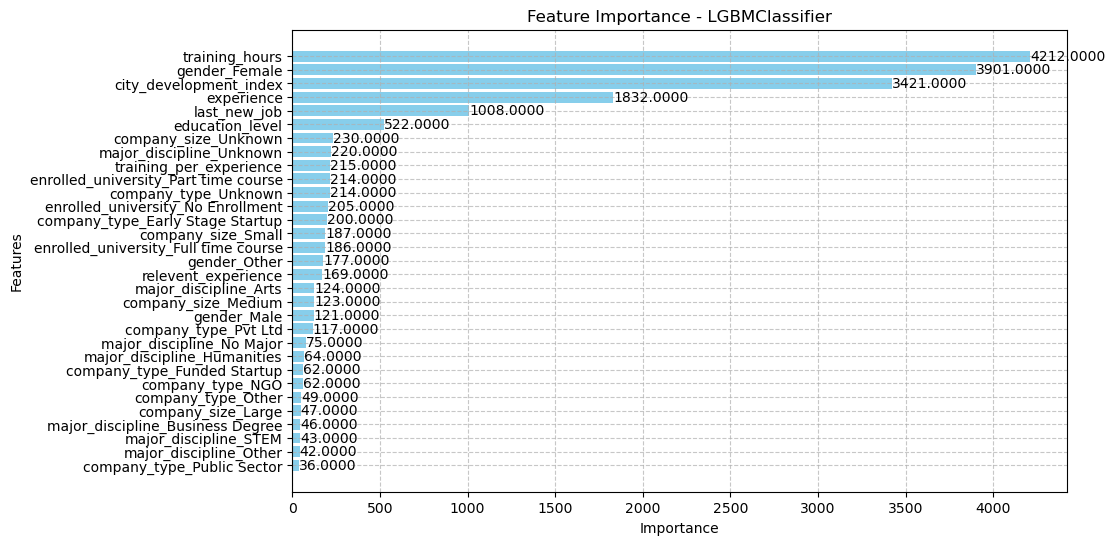

In [138]:
# Mendapatkan feature importance dari model LGBMClassifier
best_lgbm_model = lgbm_tuned.best_estimator_
feature_importance_lgbm = best_lgbm_model.feature_importances_

# Membuat DataFrame untuk menampilkan fitur dan importance
feature_names = X_train.columns  # Nama fitur dari X_train
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance_lgbm
})

# Mengurutkan berdasarkan nilai importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualisasi Feature Importance dengan Grid
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title("Feature Importance - LGBMClassifier")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # Membalik agar fitur yang paling penting ada di atas

# Menambahkan grid untuk membuat plot lebih jelas
plt.grid(True, linestyle='--', alpha=0.7)

# Menambahkan angka di sebelah kanan batang
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.4f}', va='center', ha='left', color='black')

plt.show()


# Insight dari Feature Importance - LGBMClassifier

## 1. **Fitur Paling Penting**
- **`training_hours`**: 
  - Memiliki kontribusi terbesar dalam menentukan target. 
  - Menandakan bahwa jumlah jam pelatihan karyawan memiliki dampak signifikan pada hasil prediksi.
- **`gender_Female`**: 
  - Jenis kelamin (khususnya perempuan) sangat berpengaruh terhadap model.
- **`city_development_index`**: 
  - Indeks pengembangan kota memiliki korelasi tinggi dengan hasil prediksi.
- **`experience`**: 
  - Jumlah pengalaman kerja juga menjadi salah satu faktor utama.

## 2. **Fitur Menengah Penting**
- **`last_new_job`**: 
  - Waktu sejak terakhir kali berpindah pekerjaan menunjukkan relevansi sedang terhadap target.
- **`education_level`**: 
  - Tingkat pendidikan memainkan peran moderat dalam model.

## 3. **Fitur Kurang Berpengaruh**
- Fitur seperti:
  - **`company_type_Public Sector`**
  - **`major_discipline_STEM`**
  - **`company_type_Other`** 
- Memiliki nilai importance yang rendah, menunjukkan bahwa pengaruhnya terhadap model relatif kecil.

## 4. **Implikasi Bisnis**
- **Program Pelatihan**: 
  - Menambah jam pelatihan karyawan dapat memengaruhi hasil secara signifikan. 
  - Penting bagi organisasi untuk berinvestasi dalam pengembangan keterampilan.
- **Keberagaman Gender**: 
  - Jenis kelamin memainkan peran besar dalam model. 
  - Kebijakan yang mendukung kesetaraan gender dapat memberikan dampak positif.
- **Lokasi dan Pengalaman**: 
  - Fokus pada karyawan di kota-kota dengan indeks pengembangan tinggi dan memperhatikan pengalaman kerja mereka dapat membantu mengoptimalkan hasil prediksi.
